Spearman rank correlation: 0.790 (p=0)


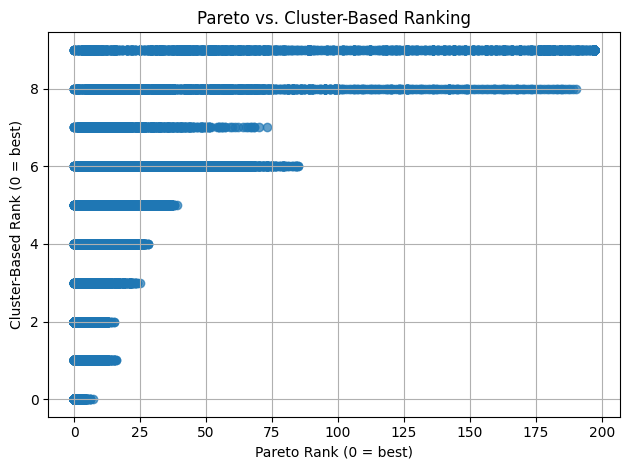

In [2]:
import pandas as pd

# === Load files ===
cluster_df = pd.read_csv("df_with_cluster_info.csv", index_col=0)
pareto_df = pd.read_csv("df_pareto.csv", index_col=0)

# === Check shape consistency ===
assert cluster_df.shape[0] == pareto_df.shape[0], "Mismatch in number of rows."

# === Merge everything ===
merged = cluster_df.copy()
merged["pareto_rank"] = pareto_df["pareto_rank"]

# === Optional: Create a flag for Rank 0 in either method ===
merged["rank0_cluster"] = (merged["rank"] == 0).astype(int)
merged["rank0_pareto"] = (merged["pareto_rank"] == 0).astype(int)

# === Compare rank correlation ===
from scipy.stats import spearmanr
corr, pval = spearmanr(merged["rank"], merged["pareto_rank"])
print(f"Spearman rank correlation: {corr:.3f} (p={pval:.3g})")

# === Optional: Save to file ===
merged.to_csv("rank_comparison.csv")

# === Optional: Visualize ===
import matplotlib.pyplot as plt

plt.scatter(merged["pareto_rank"], merged["rank"], alpha=0.7)
plt.xlabel("Pareto Rank (0 = best)")
plt.ylabel("Cluster-Based Rank (0 = best)")
plt.title("Pareto vs. Cluster-Based Ranking")
plt.grid(True)
plt.tight_layout()
plt.savefig("pareto_vs_cluster_rank.png")
plt.show()

In [3]:
print("\n📊 Pareto Rank Counts:")
print(merged["pareto_rank"].value_counts().sort_index())

print("\n📊 Cluster-Based Rank Counts:")
print(merged["rank"].value_counts().sort_index())

print("\n📊 Top Outlier Overlap (Rank 0):")
print(" - Rank 0 in Pareto only:", ((merged["rank0_pareto"] == 1) & (merged["rank0_cluster"] == 0)).sum())
print(" - Rank 0 in Cluster only:", ((merged["rank0_pareto"] == 0) & (merged["rank0_cluster"] == 1)).sum())
print(" - Rank 0 in BOTH:", ((merged["rank0_pareto"] == 1) & (merged["rank0_cluster"] == 1)).sum())


📊 Pareto Rank Counts:
pareto_rank
0       770
1      1624
2      1802
3      1555
4      1323
       ... 
193       5
194       5
195       4
196       3
197    1172
Name: count, Length: 198, dtype: int64

📊 Cluster-Based Rank Counts:
rank
0     921
1    1886
2    4155
3    1328
4    3731
5    4026
6    3498
7     819
8    1695
9    2941
Name: count, dtype: int64

📊 Top Outlier Overlap (Rank 0):
 - Rank 0 in Pareto only: 447
 - Rank 0 in Cluster only: 598
 - Rank 0 in BOTH: 323


In [4]:
rank0_both = merged[(merged["rank0_pareto"] == 1) & (merged["rank0_cluster"] == 1)]

if len(rank0_both) == 0:
    print("\n⚠️ No rows are Rank 0 in both methods.")
else:
    sample_size = min(10, len(rank0_both))
    sampled = rank0_both.sample(n=sample_size, random_state=42)
    
    print(f"\n🎯 Random Sample of {sample_size} Rows from Rank 0 in BOTH Methods:")
    print(sampled)

    # Optional: save to CSV
    sampled.to_csv("dual_rank0_sample.csv")


🎯 Random Sample of 10 Rows from Rank 0 in BOTH Methods:
                                                                                                Title  \
Authors                                                                                                 
Fabiola Cervantes-Gomez, Betty Lamothe, Jennife...  Pharmacological and Protein Profiling Suggests...   
Hui Zheng, Patricia A. Thomas                        Marital Status, Self-Rated Health, and Mortality   
Timothy J. Brown, Matthew C. Brennan, Michael L...  Association of the Extent of Resection With Su...   
Brett Leeds, Jeffrey Ritter, Sara Mitchell, And...  Alliance Treaty Obligations and Provisions, 18...   
Jiyoung Park, David M. Euhus, Philipp E. Scherer    Paracrine and Endocrine Effects of Adipose Tis...   
Bing Zhai, Cheng Wu, Linqi Wang, Matthew S. Sac...  The Antidepressant Sertraline Provides a Promi...   
Cynthia A. Frosch, Sarah J. Schoppe-Sullivan, D...  Parenting and Child Development: A Relational ...  